In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/iteam1/anomal.git

Cloning into 'anomal'...
remote: Enumerating objects: 1131, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 1131 (delta 62), reused 101 (delta 34), pack-reused 998
Receiving objects: 100% (1131/1131), 75.78 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (443/443), done.


In [6]:
#!unzip /content/drive/MyDrive/datasets.zip -d /content/anomal

In [8]:
import tensorflow as tf

In [11]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
%cd anomal

/content/anomal


In [20]:
!sudo rm -rf /content/anomal/model

In [21]:
!python3 unet/train.py

2023-03-10 08:16:57.185627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 08:16:57.185769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 08:16:57.185790: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Num GPUs Available:  1
2023-03-10 08:16:59.306397: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU

In [23]:
#!cp /content/anomal/model/unet/model.hdf5 -r /content/drive/MyDrive

In [24]:
#!python3 unet/test.py

In [111]:
from keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
import os
import random

In [30]:
model_dir = "model/unet/model.hdf5"

In [32]:
trained_model = load_model(model_dir)
trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [42]:
# load the 
trained_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [120]:
DIM = 256
src = '/content/anomal/datasets/laptop/train/good'
images= os.listdir(src)
print(len(imgs))

750


(1, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256) 0 170


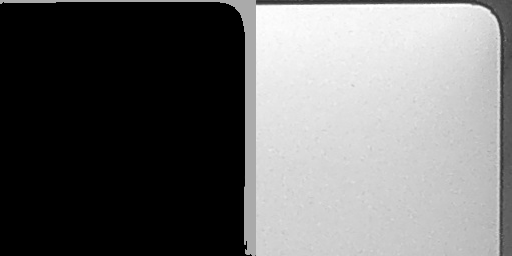

In [134]:
# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

(1, 256, 256)
1/1 [==============================] - 0s 22ms/step
(256, 256) 0 170


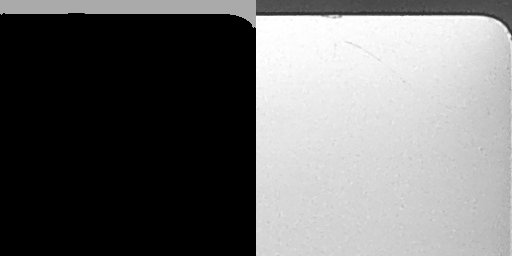

In [136]:
# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

(1, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256) 0 170


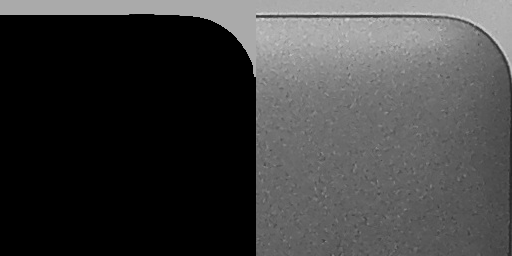

In [141]:
# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)

(1, 256, 256)
1/1 [==============================] - 0s 21ms/step
(256, 256) 0 170


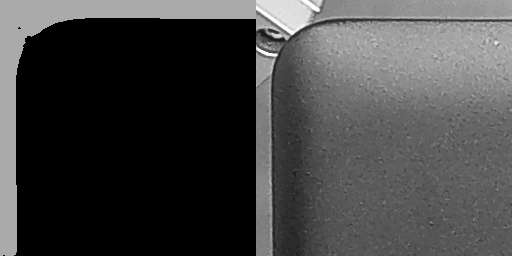

In [154]:
# predicting images
image = random.choice(images)
path = os.path.join(src,image)
img = cv2.imread(path,0)
img = img.astype('float32')
x = np.expand_dims(img, axis=0)
print(x.shape)

pred = trained_model.predict([x])
pred = pred.reshape(pred.shape[1],pred.shape[2])
pred = pred * 255
pred = pred.astype('uint8')
print(pred.shape,pred.min(),pred.max())

out = np.hstack([pred,img])
cv2_imshow(out)